In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
import csv
import os

from urllib.parse import urlparse

In [ ]:
# URL to call to get object info from met Server
# This link provides more info: https://metmuseum.github.io/#search

# API call to get Irans object metadata
url = "https://collectionapi.metmuseum.org/public/collection/v1/search?geoLocation=Iran&q=*"
response = requests.get(url)
data = response.json()
object_ids = data["objectIDs"]

#print(len(object_ids))  the length was 9481

object_info = []

# We got list of all Iran Objects Id from the previous API call, now base on https://metmuseum.github.io/#search
# do another API call to get the metadata for each Iran's object and store them in object_info
for object_id in object_ids:
        object_url = f"https://collectionapi.metmuseum.org/public/collection/v1/objects/{object_id}"
        object_response = requests.get(object_url)
        if object_response.status_code == 200:
            object_data = object_response.json()
            object_info.append(object_data)
        else:
            print(f"Failed to fetch object with ID {object_id}.")
            
# Since the data is too big for the case of testing you can uncomment the following line to just run the code 
# for the first 20 objects only 

#        if len(object_info) >= 20:  # Limiting to the first 20 objects
#            break

    # object_info now contains the information for the first 20 objects related to Iran
    # You can further process or utilize this data as needed
else:
    print("Request failed with status code:", response.status_code)
    
# The data was big and it was taking a while to get it from Met service I decided to save it into a CSV file 
# The following section will store the metadata for each Iran's object into a CSV file so we won't loose it 

# Convert object_info to a pandas DataFrame
df = pd.DataFrame(object_info)

# Save DataFrame to a CSV file
filename = "Iran_object_info.csv"
df.to_csv(filename, index=False)


print(f"Object info saved to {filename}.")


# Now we wan to visualize Iran's art count per accession year 
accession_years = [obj['accessionYear'] for obj in object_info]

# Count the occurrences of each accession year
year_counts = {}
for year in accession_years:
    if year in year_counts:
        year_counts[year] += 1
    else:
        year_counts[year] = 1

# Prepare the data for plotting
years = list(year_counts.keys())
counts = list(year_counts.values())

# Plot the count of objects per accession year
plt.bar(years, counts)
plt.xlabel('Accession Year')
plt.ylabel('Count')
plt.title('Number of Objects per Accession Year')
plt.xticks(rotation=90)
plt.show()



# This part is for downloanding the Picture of the art using the URL provided in the metadata
#desktop_directory = os.path.join(os.path.expanduser("~"), "Desktop")

#for obj in object_info:
#    object_url = obj.get("objectURL")
#    if object_url:
#        image_response = requests.get(object_url)

#        if image_response.status_code == 200:
            # Extract the image filename from the URL
#            parsed_url = urlparse(object_url)
#            image_filename = os.path.basename(parsed_url.path)

            # Save the image data to a file on the desktop
#            image_path = os.path.join(desktop_directory, image_filename)
#            with open(image_path, "wb") as f:
#                f.write(image_response.content)

#            print(f"Image saved successfully: {image_filename}")
#        else:
#           print(f"Failed to fetch image from URL: {object_url}")
#    else:
#        print("objectURL not found in object info.")

#print("All images downloaded successfully.")

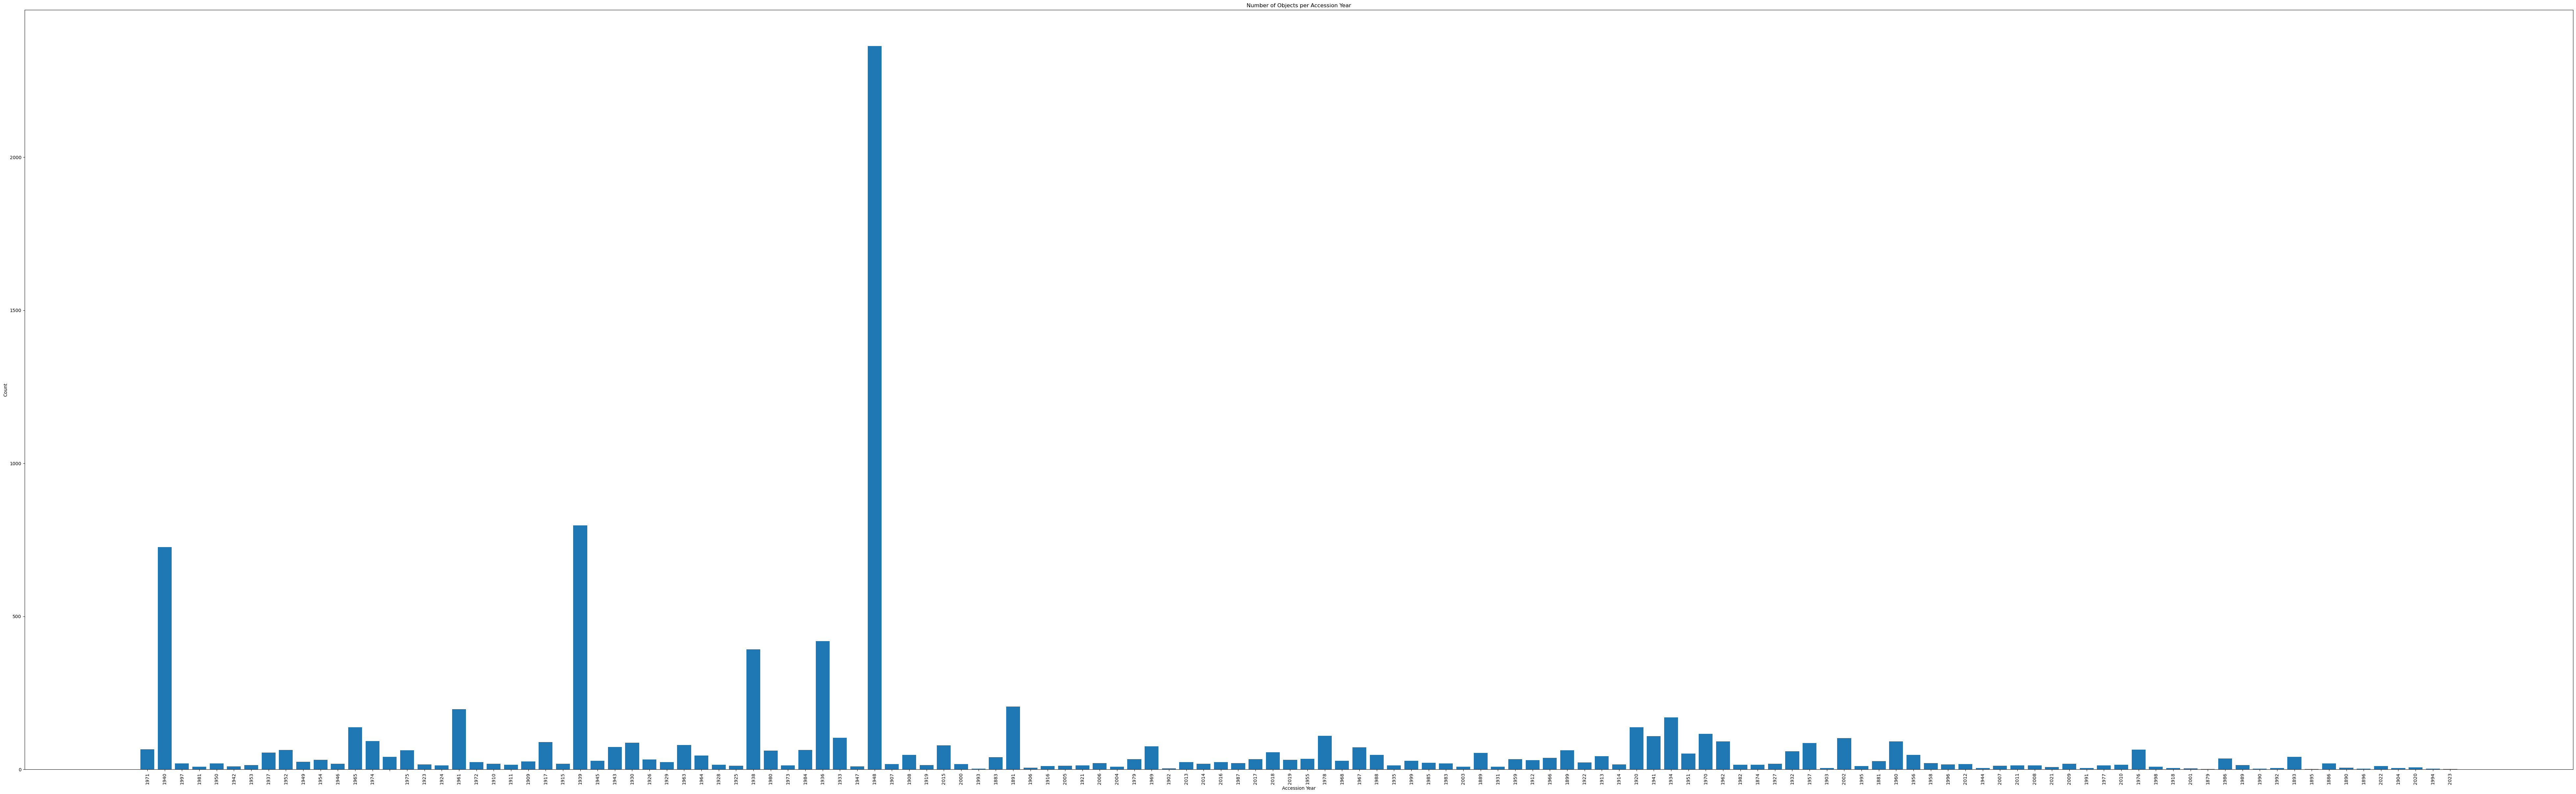

In [83]:
plt.figure(figsize=(100, 30))
plt.bar(years, counts)
plt.xlabel('Accession Year')
plt.ylabel('Count')
plt.title('Number of Objects per Accession Year')
plt.xticks(rotation=90)
plt.show()



The MET Repo has a CSV file as well that I cloned using 'git lfs clone https://github.com/metmuseum/openaccess' and I used it before doing the API code, I am submitting that code here as well
https://github.com/metmuseum/openaccess

In [ ]:
import pandas as pd
import matplotlib

In [ ]:
metRevision = pd.read_csv("metObjects.csv")

In [ ]:
countryPerYearData=metRevision[["Country","Object Name","AccessionYear"]]

In [ ]:
iranData = countryPerYearData[countryPerYearData["Country"] == "Iran"]

In [ ]:
yearColumn = iranData['AccessionYear']

iranDataPerYear = yearColumn.value_counts()

In [ ]:
from matplotlib import pyplot as plt
iranDataPerYear.plot(kind='bar',figsize = (100, 30))
plt.ylabel("Number of Objects")
plt.xlabel("Year")
plt.title("Number of Objects Per Accession Year")
plt.show()